# Collecting Amazon Reviews

To start this process I am going to select which categories would be the most suitable for this project. The goal of this project is to predict a companies stock market price based on it's products reviews on Amazon. The inspiration for this project came from a large public dataset that amazon hosts on AWS for all of its products, however this data did not fit the requirements for our needs. The AWS customer reviews dataset did not tell us what company a specific product came from. There was no unique ID of an Amazon listing to relate to each review. So instead, a dataset collected by Jianmo Ni from UCSD will be used instead. A link to this dataset can be found [here](http://deepyeti.ucsd.edu/jianmo/amazon/index.html).
    
    This dataset is broken up into several product categories. There are files in each category that relate to the product reviews and for the metadata. This metadata includes the product title, an image URL, the product ranking, the category, and most importantly the product's brand name. The categories included in the data are as follows:
    - AMAZON FASHION
    - All Beauty
    - Appliances
    - Arts Crafts and Sewing
    - Automotive
    - Books
    - CDs and Vinyl
    - Cell Phones and Accessories
    - Clothing Shoes and Jewelry
    - Digital Music
    - Electronics
    - Gift Cards
    - Grocery and Gourmet Food
    - Home and Kitchen
    - Industrial and Scientific
    - Kindle Store
    - Luxury Beauty
    - Magazine Subscriptions
    - Movies and TV
    - Musical Instruments
    - Office Products
    - Patio Lawn and Garden
    - Pet Supplies
    - Prime Pantry
    - Software
    - Sports and Outdoors
    - Tools and Home Improvement
    - Toys and Games
    - Video Games

In [3]:
import gzip
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from business_calendar import Calendar

In [4]:
def meta_reviews_df(reviews_file, meta_file, brands=[]):
    ### This function takes merges a reviews file and its associated metadata. It then reformats the dates to the nearest business day ###
    meta = []
    with gzip.open(meta_file) as f:
        for l in f:
            meta.append(json.loads(l.strip()))

    meta_df = pd.DataFrame.from_dict(meta)
    meta_df = meta_df.fillna('')
    meta_df = meta_df[~meta_df.title.str.contains('getTime')] # filter unformatted rows
    meta_df['brand'] = meta_df.brand.str.replace('by\n    \n    ', '').values
    if brands:
    # if there are no brands within the parameters, the function will do a full merge of meta and review files. Useful for data exploration
        meta_df_brands = pd.concat([meta_df[meta_df['brand'] == brand] for brand in brands], axis=0)
    else:
        meta_df_brands = meta_df
    print('Meta_brands_df Completed')
    
    reviews = []

    with gzip.open(reviews_file) as f:
        for l in f:
            reviews.append(json.loads(l.strip()))

    reviews_df = pd.DataFrame.from_dict(reviews)
    reviews_df = reviews_df.fillna('')
    
    print('reviews_df finished')
    
    review_data = reviews_df[['asin', 'overall', 'unixReviewTime']]
    meta_data = meta_df_brands[['asin', 'brand']]
    join_data = review_data.merge(meta_data, how='inner', on='asin')
    
    print('join_data finished merging')
    
    # The holidays_all dict is lists every day within my daterange that the stock market was closed within the business calander
    holidays_all = {}
    holidays_all[1998] = ['01-01','01-19', '02-16','04-10', '05-25', '07-03', '09-07', '11-26', '12-25']
    holidays_all[1999] = ['01-01','01-18','02-15','04-02','05-31','07-05','09-06','11-25','12-25']
    holidays_all[2000] = ['01-01','01-17','02-21','04-21','05-29','07-04','09-04','11-23','12-25']
    holidays_all[2001] = ['01-01', '01-15','02-19','04-13','05-28', '07-04','09-03','11-22','12-25']
    holidays_all[2002] = ['01-01','01-21','02-18','03-29','05-27', '07-04','09-02','11-28','12-25']
    holidays_all[2003] = ['01-01','01-20','02-17','04-18','05-26','07-04','09-01','11-27','12-25']
    holidays_all[2004] = ['01-01','01-19','02-16','04-09','05-31','07-05','09-06','11-25','12-24']
    holidays_all[2005] = ['01-17','02-21','03-25','05-30','07-04','09-05','11-24','12-26']
    holidays_all[2006] = ['01-02','01-16','02-20','04-14','05-29','07-04','09-04','11-23','12-25']
    holidays_all[2007] = ['01-01','01-15','02-19','04-06','05-28','07-04', '09-03','11-22','12-25']
    holidays_all[2008] = ['01-01','01-21','02-18','03-21','05-26','07-04','09-01','11-27','12-25']
    holidays_all[2009] = ['01-01','01-19','02-16', '04-10', '05-25','07-03','09-07','11-26','12-25']
    holidays_all[2010] = ['01-01','01-18','02-15','04-02','05-31','07-05','09-06','11-25','12-24']
    holidays_all[2011] = ['01-17','02-21','04-22','05-30','07-04','09-05','11-24','12-26']
    holidays_all[2012] = ['01-02','01-16','02-20','04-06','05-28','07-04','09-03','11-22','12-25']
    holidays_all[2013] = ['01-01','01-21','02-18','03-29','05-27','07-04','09-02','11-28','12-25']
    holidays_all[2014] = ['01-01','01-20','02-17','04-18','05-26','07-04','09-01','11-27','12-25']
    holidays_all[2015] = ['01-01','01-19','02-16','04-03','05-25','07-03','09-07','11-26','12-25']
    holidays_all[2016] = ['01-01','01-18','02-15','03-25','05-30','07-04','09-05','11-24','12-26']
    holidays_all[2017] = ['01-02','01-16','02-20','04-14','05-29','07-04','09-04','11-23','12-25']
    holidays_all[2018] = ['01-01','01-15','02-19','03-30','05-28','07-04','09-03','11-22','12-25']
    for i in range(1998, 2019):
        prefix = str(i) + '-'
        holidays_all[i] = [prefix + x for x in holidays_all[i]]

    holidays = []
    for k, v in holidays_all.items():
        for x in v:
            holidays.append(x)


    cal = Calendar()
    date_time = pd.to_datetime(join_data['unixReviewTime'], infer_datetime_format=True, unit='s', cache=True)
    month_after = []
    
    print('Holidays Collected')
    
    for idx, val in enumerate(date_time):
            if val.strftime('%Y-%m-%d') in holidays:
                val = val + timedelta(days=1)
            date = cal.adjust(val, 1)
            date_time[idx] = date
            month_val = cal.addbusdays(val,20)
            month_after.append(month_val)
    
    print('Day Values adjusted and month values calculated')
    
    join_data['date_time'] = date_time
    join_data['month_after'] = month_after

    return join_data.drop('unixReviewTime', axis=1)

In [5]:
def stock_df(meta_rev_file_f, cat, stock_files=[], brands=[]):
    ### This function is used to merge a joined reviews dataframe to its associated stock values and the values of its stock one month later ###
    stock_dfs = [pd.read_csv(stock) for stock in stock_files]
    for i in range(len(stock_dfs)):
        stock_dfs[i]['brand'] = brands[i]
        
    stock_df = pd.concat(stock_dfs, axis=0)        
    
    stock_df['date_time'] = stock_df['Date']
    stock_df.drop('Date', axis=1, inplace=True)
    meta_rev_file = meta_rev_file_f[['asin', 'overall', 'brand', 'date_time', 'month_after']].copy()
    meta_rev_file['date_time'] = meta_rev_file['date_time'].astype('str')
    meta_rev_file['month_after'] = meta_rev_file['month_after'].astype('str')
    m_dt = pd.merge(stock_df, meta_rev_file)
    
    new_cols = ['Open_month_after','High_month_after','Low_month_after','Close_month_after','Adj Close_month_after','Volume_month_after','brand','month_after']
    stock_df.columns = new_cols
    
    m_f = m_dt.merge(stock_df, how='inner')
    m_f['cat'] = cat
    return m_f

Meta_brands_df Completed
reviews_df finished
join_data finished merging
Holidays Collected
Day Values adjusted and month values calculated


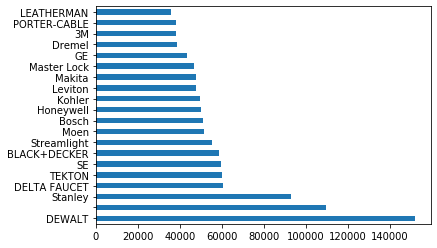

In [18]:
t = meta_reviews_df('Tools_and_Home_Improvement.json.gz', 'meta_Tools_and_Home_Improvement.json.gz')
t.brand.value_counts().sort_values(ascending=False)[:20].plot(kind='barh')

When choosing brands it is important to find companies that are publicy traded and have a large number of reviews in order to provide more input data for the model.

In [12]:
appliances = meta_reviews_df('Appliances.json.gz', 'meta_Appliances.json.gz', brands=['GE', 'Whirlpool', 'Electrolux', 'Frigidaire', 'Samsung'])

# Because Frigidaire is a subsidiary of Electrolux they will be represented by their parent comapny 
appliances['brand'] = appliances['brand'].apply(lambda x: 'Electrolux' if x =='Frigidaire' else x)
appliances.brand.value_counts()

Meta_brands_df Completed
reviews_df finished
join_data finished merging
Holidays Collected
Day Values adjusted and month values calculated


Whirlpool     106725
GE             40085
Electrolux     38029
Samsung        18872
Name: brand, dtype: int64

In [13]:
appliance_stocks = stock_df(appliances, 'Appliances', stock_files=['GE.csv', 'WHR.csv', 'ELUXY.csv', 'SMSN.IL.csv'], brands=['GE', 'Whirlpool', 'Electrolux', 'Samsung'])
appliance_stocks.to_csv('appliances_stocks.csv')

In [15]:
clothing = meta_reviews_df('Clothing_Shoes_and_Jewelry.json.gz', 'meta_Clothing_Shoes_and_Jewelry.json.gz', brands=['Nike', 'adidas', 'Columbia', 'Vans'])

Meta_brands_df Completed
reviews_df finished
join_data finished merging
Holidays Collected
Day Values adjusted and month values calculated


In [17]:
clothing_stocks = stock_df(clothing, 'Clothing', stock_files=['NKE.csv', 'ADDYY.csv', 'COLM.csv', 'VFC.csv'], brands=['Nike', 'adidas', 'Columbia', 'Vans'])

In [19]:
clothing_stocks.to_csv('Clothing_stocks.csv')

In [57]:
electronics = meta_reviews_df('Electronics.json.gz', 'meta_Electronics.json.gz', brands=['Apple', 'Microsoft', 'Sony', 'Samsung', 'Canon', 'Nikon', 'LG', 'Panasonic'])

Meta_brands_df Completed
reviews_df finished
join_data finished merging
Holidays Collected
Day Values adjusted and month values calculated


In [59]:
electronics_stocks = stock_df(electronics, 'Electronics', stock_files=['AAPL.csv', 'MSFT.csv', 'SNE.csv', 'SMSN.IL.csv','CAJ.csv', 'NINOY.csv', 'LPL.csv', 'PCRFY.csv'], brands=['Apple', 'Microsoft', 'Canon', 'Nikon', 'LG', 'Panasonic'])

In [61]:
electronics_stocks.to_csv('electronics_stocks.csv')

In [7]:
sports = meta_reviews_df('Sports_and_Outdoors.json.gz', 'meta_Sports_and_Outdoors.json.gz', brands=['Nike', 'adidas', 'Columbia', 'Under Armour', 'The North Face'])
sports.brand.value_counts()

Meta_brands_df Completed
reviews_df finished
join_data finished merging
Holidays Collected
Day Values adjusted and month values calculated


Under Armour      109592
adidas            102942
Columbia           56930
Nike               43471
The North Face     10454
Name: brand, dtype: int64

In [8]:
sports_stocks = stock_df(sports, 'Sports_and_Outdoors', stock_files=['NKE.csv', 'ADDYY.csv', 'COLM.csv', 'UA.csv', 'VFC.csv'], brands=['Nike', 'adidas', 'Columbia', 'Under Armour', 'North Face'])
sports_stocks.to_csv('sport_stocks.csv')

In [10]:
tools = meta_reviews_df('Tools_and_Home_Improvement.json.gz', 'meta_Tools_and_Home_Improvement.json.gz', brands=['GE', 'Honeywell', 'DEWALT', 'BLACK+DECKER', 'Stanley', '3M'])
tools['brand'] = tools['brand'].apply(lambda x: 'Stanley Black & Decker' if x in ['DEWALT', 'BLACK+DECKER', 'Stanley'] else x )

Meta_brands_df Completed
reviews_df finished
join_data finished merging
Holidays Collected
Day Values adjusted and month values calculated


In [12]:
tools_stocks = stock_df(tools, 'Tools_and_Home_Improvement', stock_files=['GE.csv', 'HON.csv', 'SWK.csv', 'MMM.csv'], brands=['GE', 'Honeywell', 'Stanley Black & Decker', '3M'])
tools_stocks.to_csv('tools_stocks.csv')

In [7]:
video_games = meta_reviews_df('Video_Games.json.gz', 'meta_Video_Games.json.gz', brands=['Sony', 'Microsoft', 'Nintendo', 'Ubisoft', 'Square Enix', 'Electronic Arts', 'Activision'])
video_game_stocks = stock_df(video_games, 'Video Games', stock_files=['SNE.csv', 'MSFT.csv', 'NTDOY.csv', 'UBSFF.csv', 'SQNXF.csv', 'EA.csv', 'ATVI.csv' ])

In [8]:
video_game_stocks.to_csv('video_game_stocks.csv')